# STDSR-2023-Assignment 2

*Violetta Sim, B19-DS-01*



## Task 1

In a research program on human health risk from recreational contact with water contaminated with pathogenic microbiological material, the National Institute of Water and Atmosphere (NIWA) instituted a study to determine the quality of NZ stream water at a variety of catchment types. This study is documented in McBride et al. (2002) where n = 116 one-liter water samples from sites identified as having a heavy environmental impact from birds (seagulls) and waterfowl. Out of these samples, x = 17 samples contained Giardia cysts. Let θ denote the true probability that a one-liter water sample from this type of site contains Giardia cysts.


1. What is the conditional distribution of X, the number of samples containing Giardia cysts, given θ?
2. Before the experiment, the NIWA scientists elicited that the expected value of θ is 0.2 with a standard deviation of 0.16. Determine the param- eters α and β of a Beta prior distribution for θ with this prior mean and standard deviation. (Round α and β to the nearest integer).
3. Find the posterior distribution of θ and summarize it by its posterior mean and standard deviation.
4. Plot the prior, posterior and normalized likelihood.
5. Find the posterior probability that θ < 0.1.
6. Find a central 95% posterior credible interval for θ.

#### 1. What is the conditional distribution of X, the number of samples containing Giardia cysts, given θ?

The conditional distribution of $X$ is the binomial distribution with $n=116$ trials and the probability of "success" (that a sample contains Giardia cysts) $\theta$. It is defined by the PDF:

$$
f_{X \mid \Theta}(x\mid\theta) = {n \choose x} \cdot \theta^x (1-\theta)^{n-x}
$$

#### 2. Before the experiment, the NIWA scientists elicited that the expected value of θ is 0.2 with a standard deviation of 0.16. Determine the parameters α and β of a Beta prior distribution for θ with this prior mean and standard deviation. (Round α and β to the nearest integer).

Mean and variance of the Beta distribution are the given by 

$$
\begin{cases}
E[\Theta] = \frac{\alpha}{\alpha + \beta}\\
Var[\Theta] = \frac{\alpha\beta}{(\alpha + \beta)^2  (\alpha+\beta+1)}
\end{cases}
$$

Substituting $0.2$ and $0.16^2$ for $E[\Theta]$ and $Var[\Theta]$ respectively, and solving for $\alpha$ and $\beta$, we obtain

$$
\begin{cases}
\alpha = 1.05\\
\beta = 4.2
\end{cases}
$$

Finally, round we round $\alpha$ and $\beta$ to the nearest integers, and set parameters of the prior distribution: $\alpha=1, \beta=4$. Then, the prior distribution is given by

$$
f_\Theta(\theta) = \frac{\theta\cdot(1-\theta)^{3}}{B(1, 4)}
$$

#### 3. Find the posterior distribution of θ and summarize it by its posterior mean and standard deviation.

The posterior is given by the following formula:

\begin{align}
f_{\Theta\mid X}(\theta \mid x) 
&=\frac{f_{X|\Theta}(x \mid \theta) \cdot f_\Theta(\theta)}{\int f_{X|\Theta}(x \mid \theta) \cdot f_\Theta(\theta) \cdot d\theta} \\
&= \frac{{n \choose x} \cdot \theta^x (1-\theta)^{n-x} \cdot \frac{\theta^{\alpha-1}\cdot(1-\theta)^{\beta-1}}{B(\alpha, \beta)}}{\int_0^1 {n \choose x} \cdot \theta^x (1-\theta)^{n-x} \cdot \frac{\theta^{\alpha-1}\cdot(1-\theta)^{\beta-1}}{B(\alpha, \beta)} d\theta} \\
&= \frac{ {n \choose x} \theta^x (1-\theta)^{n-x} \cdot \frac{\theta^{\alpha-1}\cdot(1-\theta)^{\beta-1}}{B(\alpha, \beta)}}{{n \choose x} \frac{B(\alpha + x, \beta +x -n)}{B(\alpha, \beta)}}\\
&= \frac{ \theta^{\alpha-1 + x} (1-\theta)^{\beta-1 +n-x} }{B(\alpha + x, \beta +x -n)}
\end{align}

The posterior distribution appears to be beta distribution with new parameters $\alpha + x$ and $\beta +n -x$.

The mean and standard deviation are then:

$$
\begin{cases}
E[\Theta] = \frac{\alpha + x }{\alpha + \beta + n} = \frac{1 + 17}{1 + 4 + 116} = 0.15\\
\sqrt{Var[\Theta]} = \sqrt{\frac{(\alpha + x)\cdot (\beta +n -x)}{(\alpha + \beta + n)^2  (\alpha+\beta + n +1)}} = \sqrt{\frac{18 \cdot 115}{121^2 \cdot 122}} \approx 0.034
\end{cases}
$$

#### 4. Plot the prior, posterior and normalized likelihood.

In [ ]:
import scipy.stats
import scipy.special
import numpy as np
import matplotlib.pyplot as plt
from math import comb

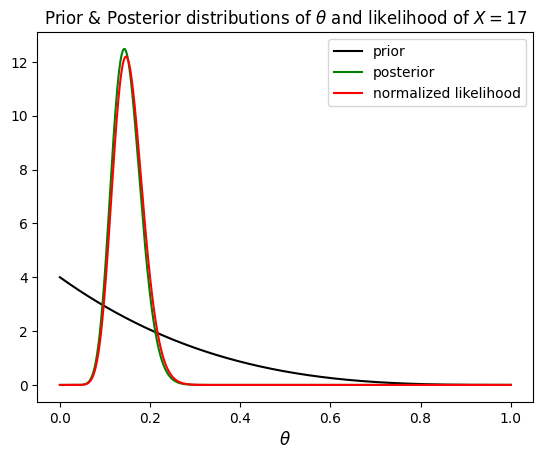

In [ ]:
alpha = 1
beta = 4
n = 116
x = 17

thetas = np.linspace(0, 1, 1000)
prior = scipy.stats.beta.pdf(thetas, alpha, beta)
posterior = scipy.stats.beta.pdf(thetas, alpha + x, beta + n - x)
norm_likelihood = scipy.stats.binom.pmf(x, n, thetas) / scipy.special.beta(x + 1, n-x+1) / comb(n,x)

fig, ax = plt.subplots()
ax.plot(thetas, prior, color='k', label='prior')
ax.plot(thetas, posterior, color='g', label='posterior')
ax.plot(thetas, norm_likelihood, color='r', label='normalized likelihood')
ax.set_xlabel(r"$\theta$", fontsize=12)
ax.set_title(r"Prior & Posterior distributions of $\theta$ and likelihood of $X=17$")
plt.legend()
plt.show()

#### 5. Find the posterior probability that θ < 0.1

Posterior probability that θ < 0.1 is value of CDF of Beta distribution with $\alpha=18, \beta=103$ at 0.1

In [ ]:
ans = scipy.stats.beta.cdf(0.1, alpha + x, beta + n - x)
print(f"the posterior probability that θ < 0.1 is {ans}")

the posterior probability that θ < 0.1 is 0.053094376993042654


#### 6. Find a central 95% posterior credible interval for θ.


In [ ]:
left, right = scipy.stats.beta.ppf(0.025, alpha + x, beta + n - x), scipy.stats.beta.ppf(0.975, alpha + x, beta + n - x)
print(f"the central 95% posterior credible interval for θ is ({left}, {right})")

the central 95% posterior credible interval for θ is (0.09138957252823, 0.21710689824337648)
